In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1년 = 252일, risk free rate = 1.5%

In [2]:
pd.read_csv('business_cycle_label.csv')

,Unnamed: 0,cycle
0,2000-01-03,1
1,2000-01-04,1
2,2000-01-05,1
3,2000-01-06,1
4,2000-01-07,1
...,...,...
6445,2020-12-26,1
6446,2020-12-27,1
6447,2020-12-28,1
6448,2020-12-29,1


In [3]:
pd.read_csv('midterm_data.csv')

,Unnamed: 0,Spain 10Y,KOSPI,SPY,crudeOilFutures,naturalGasFutures,goldFutures,copperFutures
0,2000-01-03,-0.033410,0.000000,-0.009787,0.000000,0.000000,0.003478,0.000000
1,2000-01-04,-0.029896,0.030124,-0.039106,-0.001953,-0.053913,-0.021837,-0.017009
2,2000-01-05,0.002970,-0.068675,0.001789,-0.025049,-0.003676,-0.005138,0.011337
3,2000-01-06,0.005952,-0.025874,-0.016072,-0.005219,0.012915,0.000356,-0.002950
4,2000-01-07,-0.002978,-0.012635,0.058076,-0.022599,-0.010474,0.002314,0.000592
...,...,...,...,...,...,...,...,...
6445,2020-12-26,-0.027024,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6446,2020-12-27,0.019165,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6447,2020-12-28,-0.002837,0.000620,0.008591,-0.012648,-0.076251,-0.002471,0.002386
6448,2020-12-29,0.016881,0.004241,-0.001908,0.007980,0.050731,0.003635,-0.004341


In [4]:
data = pd.read_csv('midterm_data.csv') # 데이터
cycle = pd.read_csv('business_cycle_label.csv') # 사이클 

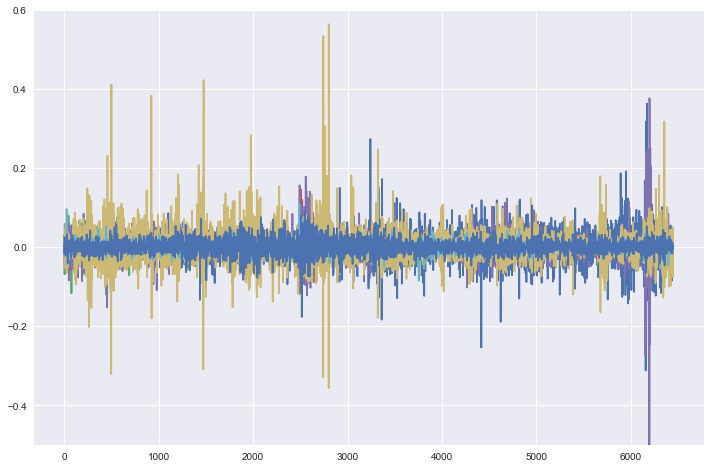

In [20]:
%matplotlib inline
plt.style.use('seaborn')
plt.figure(figsize = (12,8))
plt.grid(True)
plt.ylim(-0.5,0.6)
plt.plot(data.iloc[:,1:])

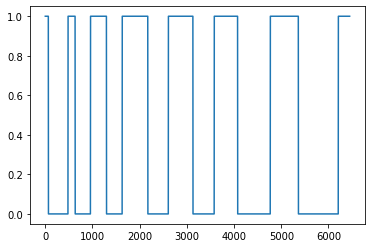

In [14]:
plt.plot(cycle.iloc[:,1:])

In [23]:
cycle.shape

(6450, 2)

In [24]:
data.shape

(6450, 8)

df : 전체 데이터를 뜻함

In [37]:
df = pd.concat([data.iloc[:,1:],cycle.iloc[:,1:]], axis = 1)

In [47]:
df_up = df[df.cycle == 1]

In [48]:
df_down = df[df.cycle == 0]

In [49]:
df_up.shape

(2952, 8)

In [50]:
df_down.shape

(3498, 8)

(2) Random Portfolio 만들기

In [52]:
df_up.columns

Index(['Spain 10Y', 'KOSPI', 'SPY', 'crudeOilFutures', 'naturalGasFutures',
       'goldFutures', 'copperFutures', 'cycle'],
      dtype='object')

<ipython-input-185-613ca3160cbd>:27: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='Sharpe Ratio')


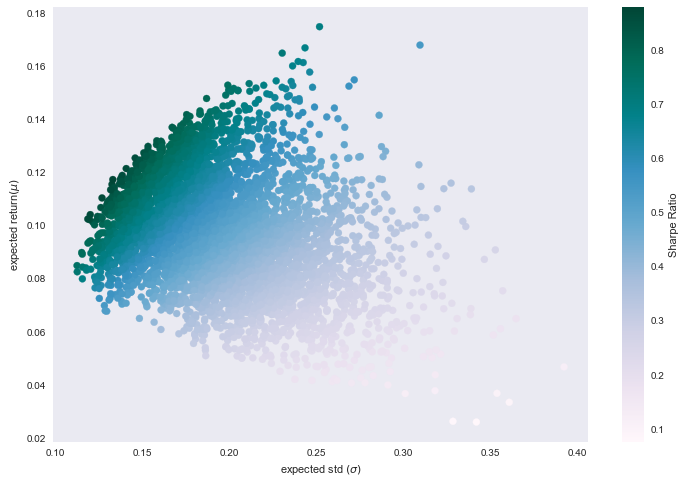

In [185]:
noa = len(df.columns[:-1])

#df

port_df = []
port_std = []

def ret_std(weight, ret):
    port_mean = np.sum(weight * ret.mean() * 252)
    port_var = np.dot(weight.T, np.dot(ret.cov()*252, weight))
    port_std = np.sqrt(port_var)
    
    return port_mean, port_std

for i in range(5000):
    weight = np.random.random(noa)
    weight /= np.sum(weight)
    mu, sig = ret_std(weight, df.iloc[:,:-1])
    port_df.append(mu)
    port_std.append(sig)
    
sr = np.array(port_df)/np.array(port_std)

plt.style.use('seaborn')
plt.figure(figsize=(12,8))
plt.scatter(port_std, port_df, marker='o', c=sr, cmap='PuBuGn')
plt.colorbar(label='Sharpe Ratio')
plt.ylabel('expected return$(μ)$')
plt.xlabel('expected std $(σ)$');
plt.grid(False)

<ipython-input-88-3b18e320fbb3>:25: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='Sharpe Ratio')


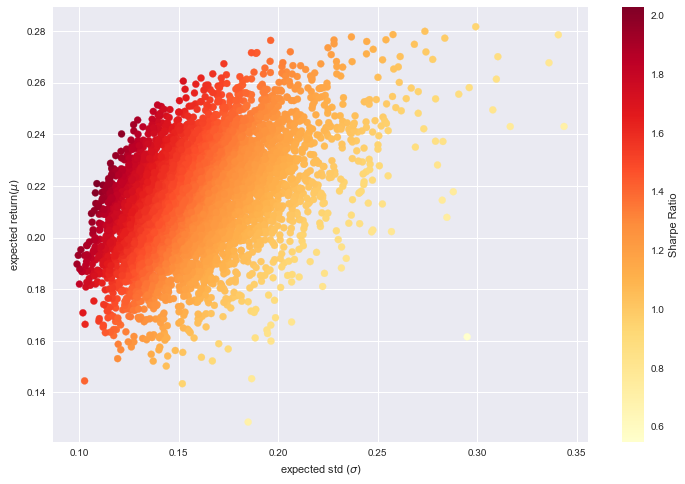

In [88]:
#df_up

port_df_up = []
port_std_up = []

def ret_std(weight, ret):
    port_mean = np.sum(weight * ret.mean() * 252)
    port_var = np.dot(weight.T, np.dot(ret.cov()*252, weight))
    port_std = np.sqrt(port_var)
    
    return port_mean, port_std

for i in range(5000):
    weight_up = np.random.random(noa)
    weight_up /= np.sum(weight_up)
    mu, sig = ret_std(weight_up, df_up.iloc[:,:-1])
    port_df_up.append(mu)
    port_std_up.append(sig)
    
sr_up = np.array(port_df_up)/np.array(port_std_up)

plt.style.use('seaborn')
plt.figure(figsize=(12,8))
plt.scatter(port_std_up, port_df_up, marker='o', c=sr_up, cmap='YlOrRd')
plt.colorbar(label='Sharpe Ratio')
plt.ylabel('expected return$(μ)$')
plt.xlabel('expected std $(σ)$');
plt.grid(True)

<ipython-input-89-62485c30efe1>:25: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='Sharpe Ratio')


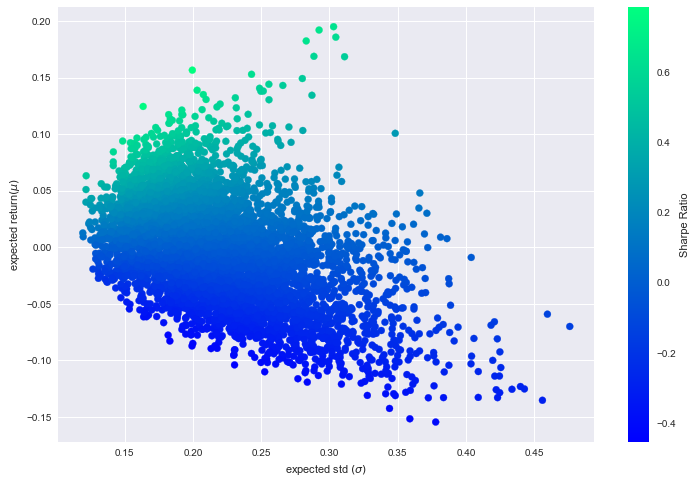

In [89]:
#df_down

port_df_down = []
port_std_down = []

def ret_std(weight, ret):
    port_mean = np.sum(weight * ret.mean() * 252)
    port_var = np.dot(weight.T, np.dot(ret.cov()*252, weight))
    port_std = np.sqrt(port_var)
    
    return port_mean, port_std

for i in range(5000):
    weight_down = np.random.random(noa)
    weight_down /= np.sum(weight_down)
    mu, sig = ret_std(weight_down, df_down.iloc[:,:-1])
    port_df_down.append(mu)
    port_std_down.append(sig)
    
sr_down = np.array(port_df_down)/np.array(port_std_down)

plt.style.use('seaborn')
plt.figure(figsize=(12,8))
plt.scatter(port_std_down, port_df_down, marker='o', c = sr_down, cmap='winter')
plt.colorbar(label='Sharpe Ratio')
plt.ylabel('expected return$(μ)$')
plt.xlabel('expected std $(σ)$');
plt.grid(True)

- mean variance frontier 그리기

In [129]:
import scipy.optimize as opt

def statistics(weights, rf=0):
    weights = np.array(weights)
    pret = np.sum(df.iloc[:,:-1].mean() * weights) * 252 - rf
    pvol = np.sqrt(np.dot(weights.T, np.dot(df.iloc[:,:-1].cov() * 252, weights)))
    return np.array([pret, pvol, pret / pvol])

In [130]:
def min_func_port(weights):
    return statistics(weights)[1]

cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret}, {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})

bnds = tuple([(0, 1) for x in range(noa)])

trets = np.linspace(0.02, 0.2, 50)
tvols = []
for tret in trets:
    cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},
            {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
    res = opt.minimize(min_func_port, noa * [1. / noa,], method='SLSQP' ,
                   bounds=bnds, constraints=cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

<ipython-input-132-3046108b1171>:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='Sharpe ratio')


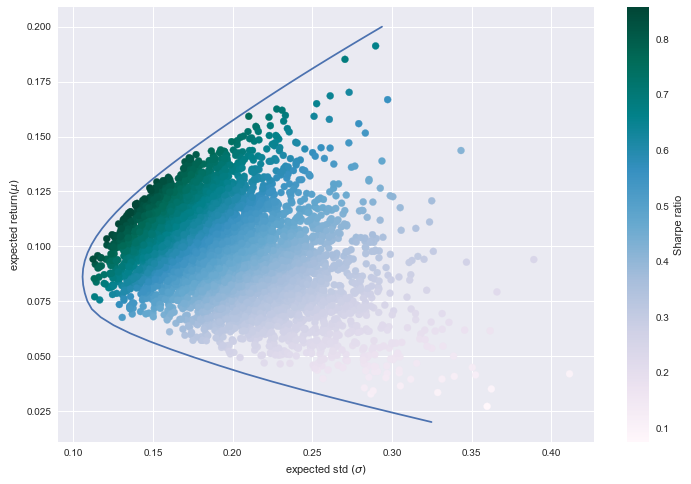

In [132]:
plt.figure(figsize=(12, 8))
plt.scatter(port_std, port_df,
            c=np.array(port_df) / np.array(port_std), marker='o', cmap='PuBuGn')
plt.plot(tvols, trets)
plt.grid(True)
plt.ylabel('expected return$(μ)$')
plt.xlabel('expected std $(σ)$');
plt.colorbar(label='Sharpe ratio')

In [155]:
#df_up

def statistics_up(weights, rf=0):
    weights = np.array(weights)
    pret = np.sum(df_up.iloc[:,:-1].mean() * weights) * 252 - rf
    pvol = np.sqrt(np.dot(weights.T, np.dot(df_up.iloc[:,:-1].cov() * 252, weights)))
    return np.array([pret, pvol, pret / pvol])

def min_func_port_up(weights):
    return statistics_up(weights)[1]

cons = ({'type': 'eq', 'fun': lambda x:  statistics_up(x)[0] - tret}, {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})

bnds = tuple([(0, 1) for x in range(noa)])

trets_up = np.linspace(0.14, 0.28, 50)
tvols_up = []
for tret in trets_up:
    cons = ({'type': 'eq', 'fun': lambda x:  statistics_up(x)[0] - tret},
            {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
    res = opt.minimize(min_func_port_up, noa * [1. / noa,], method='SLSQP' ,
                   bounds=bnds, constraints=cons)
    tvols_up.append(res['fun'])
tvols_up = np.array(tvols_up)

<ipython-input-156-00b91eb913aa>:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='Sharpe ratio')


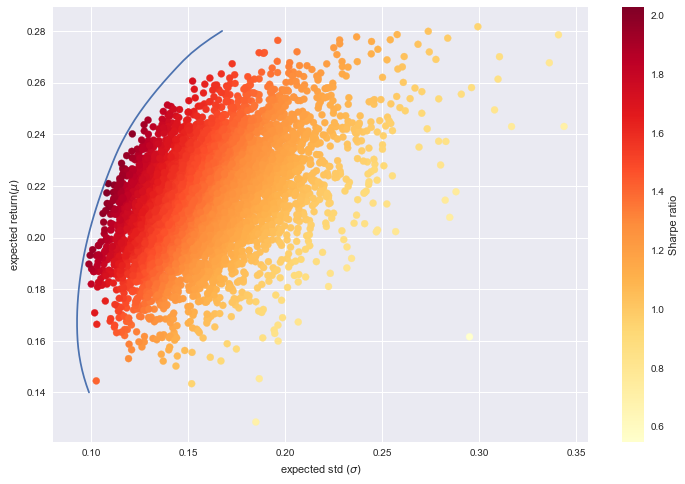

In [156]:
plt.figure(figsize=(12, 8))
plt.scatter(port_std_up, port_df_up,
            c=np.array(port_df_up) / np.array(port_std_up), marker='o', cmap='YlOrRd')
plt.plot(tvols_up, trets_up)
plt.grid(True)
plt.ylabel('expected return$(μ)$')
plt.xlabel('expected std $(σ)$');
plt.colorbar(label='Sharpe ratio')

In [127]:
#df_down

def statistics_down(weights, rf=0):
    weights = np.array(weights)
    pret = np.sum(df_down.iloc[:,:-1].mean() * weights) * 252 - rf
    pvol = np.sqrt(np.dot(weights.T, np.dot(df_down.iloc[:,:-1].cov() * 252, weights)))
    return np.array([pret, pvol, pret / pvol])

def min_func_port_down(weights):
    return statistics_down(weights)[1]

cons = ({'type': 'eq', 'fun': lambda x:  statistics_down(x)[0] - tret}, {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})

bnds = tuple([(0, 1) for x in range(noa)])

trets_down = np.linspace(-0.17, 0.2, 50)
tvols_down = []
for tret in trets_down:
    cons = ({'type': 'eq', 'fun': lambda x:  statistics_down(x)[0] - tret},
            {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
    res = opt.minimize(min_func_port_down, noa * [1. / noa,], method='SLSQP' ,
                   bounds=bnds, constraints=cons)
    tvols_down.append(res['fun'])
tvols_down = np.array(tvols_down)

<ipython-input-128-454e27b014f4>:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='Sharpe ratio')


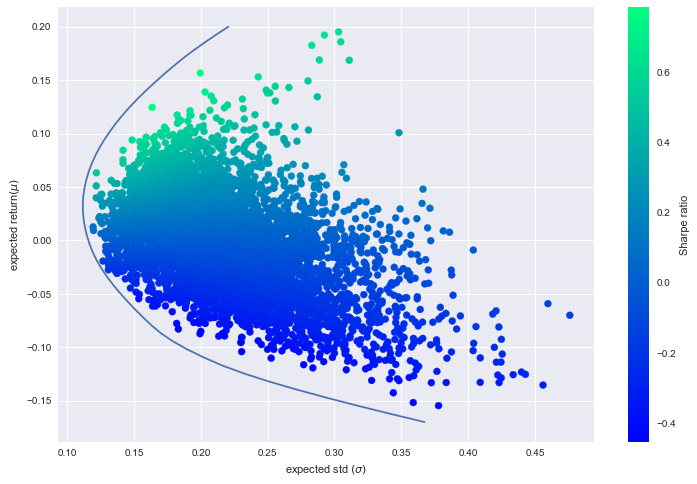

In [128]:
plt.figure(figsize=(12, 8))
plt.scatter(port_std_down, port_df_down,
            c=np.array(port_df_down) / np.array(port_std_down), marker='o', cmap='winter')
plt.plot(tvols_down, trets_down)
plt.grid(True)
plt.ylabel('expected return$(μ)$')
plt.xlabel('expected std $(σ)$');
plt.colorbar(label='Sharpe ratio')

(3) efficient frontier, annualized sharpe ratio 도출하기

In [147]:
#df의 CML구하기

def min_func_sharpe(weights, rf=0.015):
    return -statistics(weights, rf)[2]

cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
bnds = tuple([(0, 1) for x in range(noa)])
noa * [1. / noa,]

opts = opt.minimize(min_func_sharpe, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)

rf = 0.015
slope = (statistics(opts['x'])[0] - rf ) / statistics(opts['x'])[1]
var_list = [x*slope + rf for x in np.linspace(0,0.3,5000)]

<ipython-input-148-f873bdc1cf31>:17: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='Sharpe ratio')


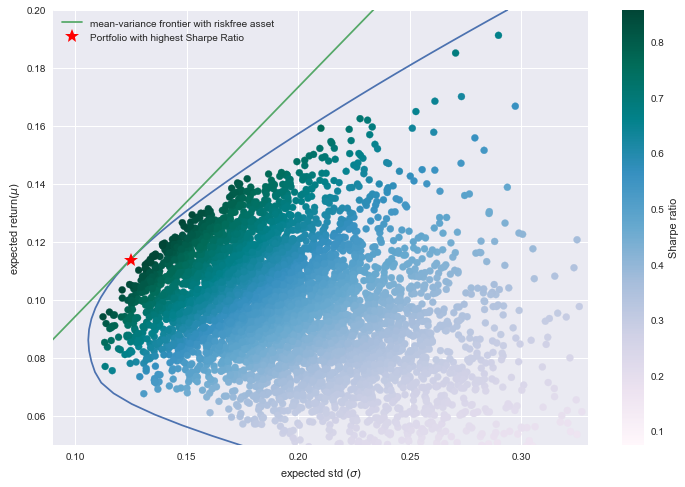

In [148]:
x = np.linspace(0,0.3,5000)
y = var_list

plt.figure(figsize=(12,8))
plt.scatter(port_std, port_df,
            c=np.array(port_df) / np.array(port_std), marker='o', cmap='PuBuGn')
plt.plot(tvols, trets)
plt.plot(x,y, label = 'mean-variance frontier with riskfree asset')
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0],
         'r*', markersize=15.0, label = 'Portfolio with highest Sharpe Ratio')
plt.xlim(0.09,0.33)
plt.ylim(0.05,0.2)
plt.legend()
plt.grid(True)
plt.ylabel('expected return$(μ)$')
plt.xlabel('expected std $(σ)$');
plt.colorbar(label='Sharpe ratio')

In [167]:
#df_up의 CML구하기

def min_func_sharpe_up(weights, rf=0.015):
    return -statistics_up(weights, rf)[2]

cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
bnds = tuple([(0, 1) for x in range(noa)])
noa * [1. / noa,]

opts_up = opt.minimize(min_func_sharpe_up, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)

rf = 0.015
slope_up = (statistics_up(opts_up['x'])[0] - rf ) / statistics_up(opts_up['x'])[1]
var_list_up = [x*slope_up + rf for x in np.linspace(0,0.6,5000)]

<ipython-input-178-504e05d234c3>:17: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='Sharpe ratio')


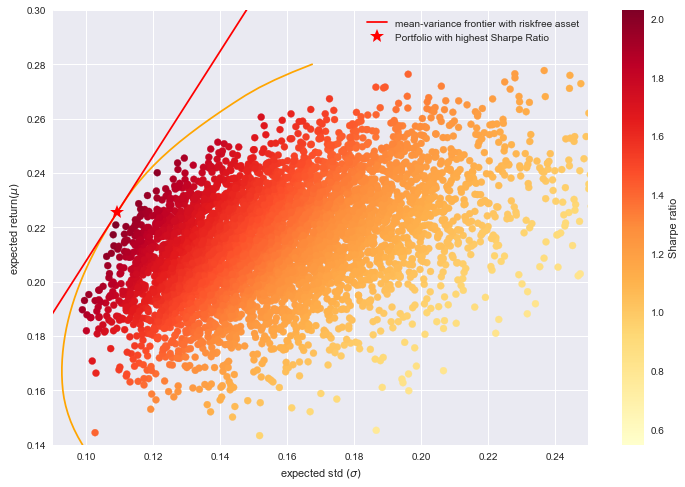

In [178]:
x_up = np.linspace(0,0.6,5000)
y_up = var_list_up

plt.figure(figsize=(12,8))
plt.scatter(port_std_up, port_df_up,
            c=np.array(port_df_up) / np.array(port_std_up), marker='o', cmap='YlOrRd')
plt.plot(tvols_up, trets_up, color='orange')
plt.plot(x_up,y_up, color = 'red', label = 'mean-variance frontier with riskfree asset')
plt.plot(statistics_up(opts_up['x'])[1], statistics_up(opts_up['x'])[0],
         'r*', markersize=15.0, label = 'Portfolio with highest Sharpe Ratio')
plt.xlim(0.09,0.25)
plt.ylim(0.14,0.3)
plt.legend()
plt.grid(True)
plt.ylabel('expected return$(μ)$')
plt.xlabel('expected std $(σ)$');
plt.colorbar(label='Sharpe ratio')

In [169]:
#df_up의 CML구하기

def min_func_sharpe_down(weights, rf=0.015):
    return -statistics_down(weights, rf)[2]

cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
bnds = tuple([(0, 1) for x in range(noa)])
noa * [1. / noa,]

opts_down = opt.minimize(min_func_sharpe_down, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)

rf = 0.015
slope_down = (statistics_down(opts_down['x'])[0] - rf ) / statistics_down(opts_down['x'])[1]
var_list_down = [x*slope_down + rf for x in np.linspace(0,0.6,5000)]

<ipython-input-179-77786abd604c>:17: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='Sharpe ratio')


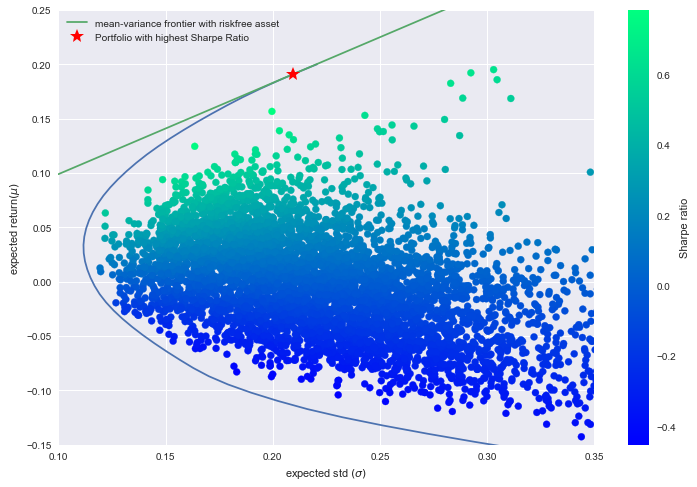

In [179]:
x_down = np.linspace(0,0.6,5000)
y_down = var_list_down

plt.figure(figsize=(12,8))
plt.scatter(port_std_down, port_df_down,
            c=np.array(port_df_down) / np.array(port_std_down), marker='o', cmap='winter')
plt.plot(tvols_down, trets_down)
plt.plot(x_down,y_down, label = 'mean-variance frontier with riskfree asset')
plt.plot(statistics_down(opts_down['x'])[1], statistics_down(opts_down['x'])[0],
         'r*', markersize=15.0, label = 'Portfolio with highest Sharpe Ratio')
plt.xlim(0.1,0.35)
plt.ylim(-0.15,0.25)
plt.legend()
plt.grid(True)
plt.ylabel('expected return$(μ)$')
plt.xlabel('expected std $(σ)$');
plt.colorbar(label='Sharpe ratio')

샤프 비율 구하기

In [180]:
slope

0.7918486533569553

In [183]:
slope_up

1.926944382288438

In [184]:
slope_down

0.8394992318586554